# 데이터 불균형 처리
- 데이터 불균형 => 데이터셋에서 특정 클래스의 데이터가 과다한 경우를 의미
  - 만약 데이터셋을 2개 라벨로 분류하는데, 한 종류가 90%라면, 항상 하나로만 분류하는 모델을 만들어도 90% 정확도를 갖게됨
- 불균형 이슈를 해결하기 위해 업샘플링, 다운샘플링, 인공 훈련 데이터 샘플 생성(SMOTE) 방법 등을 고려
- 업샘플링 => 적은 클래스의 데이터셋을 반복 복원 추출하는 방식으로 불균형 해소
  - 다운샘플링 => 큰 클래스의 데이터셋을 적게 추출하는 방식으로 불균형 해소
  - 인공 훈련 데이터 샘플 생성(SMOTE 알고리즘)

x shape=(569, 30), y shape=(569,)
222
10
212


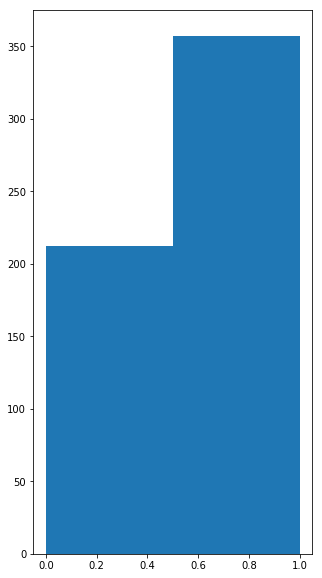

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer # 분류 목적 유방암 데이터셋
from sklearn.utils import resample # 업/다운샘플링 목적

# 데이터 수집 및 이해
x, y = load_breast_cancer(return_X_y = True, as_frame = True)
print(f"x shape={x.shape}, y shape={y.shape}")
#print(x.head())
#print(y.head())

# 0에해당하는게 212, 1에해당하는거 10개 넣어서 222개로 구성
x_imb = np.vstack((x[y == 0], x[y == 1][:10]))
y_imb = np.hstack((y[y == 0], y[y == 1][:10]))

print(len(x_imb))

fig = plt.figure(figsize=(5, 10))
ax1 = fig.add_subplot(1, 1, 1)

# bins = 막대개수
ax1.hist(y, range = (0,1), bins = 2)

print(y_imb[y_imb == 1].shape[0]) # 1의 개수, 총 10개

x_up, y_up = resample(
    x_imb[y_imb == 1]
    , y_imb[y_imb == 1]
    , replace = True
    , n_samples=x_imb[y_imb == 0].shape[0]
)

# 업샘플링을 통해 0에 해당하는샘플개수를 증가
print(x_up.shape[0])

# 업샘플링된 결과 데이터셋을 이용
x_bal = np.vstack((x[y == 0], x_up))
y_bal = np.vstack((y[y == 0], y_up))